brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64
Correlation Matrix:
                       normalized_used_price  main_camera_mp       ram
normalized_used_price               1.000000        0.585487  0.493976
main_camera_mp                      0.585487        1.000000  0.260802
ram                                 0.493976        0.260802  1.000000


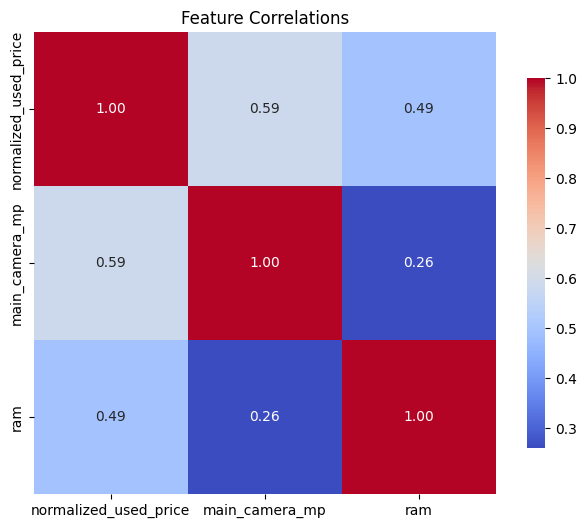

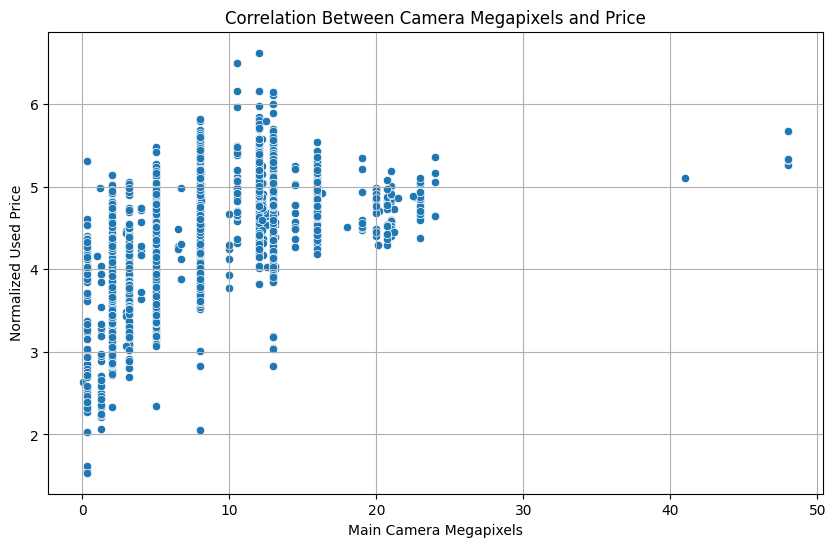

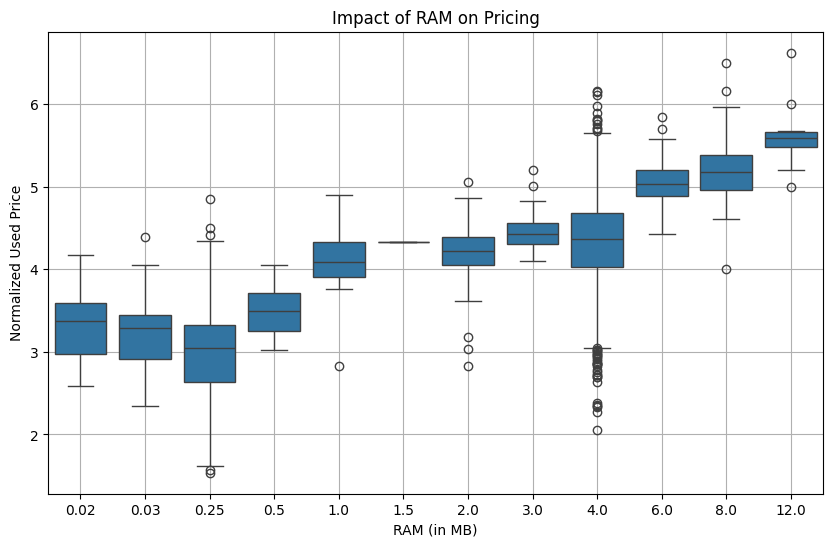

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("used_device_data.csv")  


from sklearn.model_selection import train_test_splitfrom 
from sklearn.linear_model import LinearRegressionfrom 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error# Splitting the dataX = df[['screen_size', 'main_camera_mp', 'ram', 'int_memory', 'battery']]y = df['normalized_used_price']X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Fitting the modelmodel = LinearRegression()
model.fit(X_train, y_train)
# Predictionsy_pred = model.predict(X_test)
# Performance metricsr2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'R² Score: {r2}, MAE: {mae}, RMSE: {rmse}')













# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values in relevant columns
data = data.dropna(subset=['normalized_used_price', 'main_camera_mp', 'ram'])

# Key Correlations
def key_correlations(data):
    # Calculate the correlation matrix
    correlation_matrix = data[['normalized_used_price', 'main_camera_mp', 'ram']].corr()

    # Print the correlation matrix
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Plotting the heatmap for correlations
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
    plt.title('Feature Correlations')
    plt.show()

    # Correlation between camera megapixels and price
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='main_camera_mp', y='normalized_used_price')
    plt.title('Correlation Between Camera Megapixels and Price')
    plt.xlabel('Main Camera Megapixels')
    plt.ylabel('Normalized Used Price')
    plt.grid()
    plt.show()

    # Impact of RAM on pricing
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='ram', y='normalized_used_price')
    plt.title('Impact of RAM on Pricing')
    plt.xlabel('RAM (in MB)')
    plt.ylabel('Normalized Used Price')
    plt.grid()
    plt.show()

# Call the key correlations function
key_correlations(data)